<a href="https://colab.research.google.com/github/Chengeng-Yang/ML_projects/blob/main/ML_EXAMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

import tensorflow.keras
import pandas as pd
import numpy as np
import sklearn as sk
import tensorflow as tf
import os            # OS is for interfacing your own operative system
import time          # Time is for estimating the computational time of every operation
import matplotlib    # MatPlotLib is for making plots & figures
import matplotlib.pyplot as plt  # PyPlot is a subset of the library for making MATLAB-style plots

In [ ]:
# Problem set 1 
# import data

import csv
train = open('training.csv')
traindata = np.genfromtxt(train, dtype=float, converters=None,delimiter=',',skip_header=1)

test = open('testing.csv')
testdata = np.genfromtxt(test, dtype=float, converters=None,delimiter=',',skip_header=1)


In [ ]:
#check if there's nan data
print(np.where(np.isnan(traindata)),np.where(np.isnan(testdata)))

(array([], dtype=int64), array([], dtype=int64)) (array([], dtype=int64), array([], dtype=int64))


In [ ]:
xtrain = traindata[:,0:617]
ytrain = traindata[:,617]

xtrain

array([[-0.4394, -0.093 ,  0.1718, ...,  0.641 ,  0.5898, -0.4872],
       [-0.4348, -0.1198,  0.2474, ...,  0.4318,  0.4546, -0.091 ],
       [-0.233 ,  0.2124,  0.5014, ...,  0.254 ,  0.1588, -0.4762],
       ...,
       [-0.5824, -0.1646,  0.1406, ...,  0.6812,  0.517 ,  0.343 ],
       [ 0.016 ,  0.8168,  1.    , ...,  0.1034, -0.1954, -0.862 ],
       [-0.6116, -0.104 ,  0.2566, ..., -0.0536,  0.0714, -0.0892]])

In [ ]:
xtest = testdata[:,0:617]
ytest = testdata[:,617]

ytest

array([ 1.,  1.,  2., ..., 25., 26., 26.])

In [ ]:
xtrain.shape

(6238, 617)

In [ ]:
ytrain0 = ytrain-1
ytrain0 = ytrain0.astype('int')
ytrain0

array([ 0,  0,  1, ..., 23, 24, 25])

In [ ]:
ytest0 = ytest-1
ytest0 = ytest0.astype('int')
ytest0.dtype

dtype('int64')

In [ ]:
#split validation data from training data

from sklearn.model_selection import train_test_split
shuffle_index = np.random.permutation(6238)
xtrain_s,ytrain0_s = xtrain[shuffle_index],ytrain0[shuffle_index]

xt,xv,yt,yv = train_test_split(xtrain_s,ytrain0_s,test_size=0.2,random_state=36)

In [ ]:
xv.shape

(1248, 617)

In [ ]:
#DNN
from tensorflow import keras

# initializstion
keras.backend.clear_session()
np.random.seed(36)
tf.random.set_seed(36)

# set up a DNN model
def dnn_model(n_hidden, n_neurons, optim, activation):
    clf1 = keras.models.Sequential()
    clf1.add(keras.layers.InputLayer(input_shape=[617]))
    for layer in range(n_hidden):
        clf1.add(keras.layers.Dense(n_neurons, activation=activation))
    clf1.add(keras.layers.Dense(26, activation="softmax"))
    clf1.compile(loss="sparse_categorical_crossentropy", optimizer=optim, metrics=["accuracy"])
    return clf1

# a wrapper to use the clf1 in scikit-learn
clftemp = keras.wrappers.scikit_learn.KerasClassifier(dnn_model)

# set parameters
param1 = {
    "n_hidden": np.arange(2, 6, 1).tolist(),
    "n_neurons": np.arange(1, 100, 20).tolist(),
    "activation":["relu", "tanh","selu"],
    "optim": ["SGD", "RMSprop", "Adam"], 
}

In [ ]:
# set up callback function used to store parameters at the end of each epoch
checkpoint = keras.callbacks.ModelCheckpoint(filepath="./training.h5")

# early stop training, patience = 5 epochs
earlystop = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

search_cv1 = RandomizedSearchCV(clftemp, param1, n_iter = 50, cv=4, verbose=0, n_jobs=1)

# run the grid search
search_cv1.fit(xt, yt,
            epochs = 15,
            validation_data = (xv, yv),
            verbose = 0,
            callbacks=[earlystop, checkpoint])

print(search_cv1.best_params_)

39/39 [==============================] - 0s 4ms/step - loss: 0.2055 - accuracy: 0.9391


39/39 [==============================] - 0s 3ms/step - loss: 0.4985 - accuracy: 0.9022


39/39 [==============================] - 0s 3ms/step - loss: 0.1610 - accuracy: 0.9527
{'optim': 'Adam', 'n_neurons': 81, 'n_hidden': 2, 'activation': 'tanh'}


In [ ]:
checkpoint_cb.filepath
#import h5py
#a = h5py.File('model_trained.h5',"r")
#a

'model_trained.h5'

In [ ]:
print(search_cv1.best_params_)

{'optim': 'Adam', 'n_neurons': 81, 'n_hidden': 2, 'activation': 'tanh'}


In [ ]:
# save the best parameters
p1, p2, p3, p4 = search_cv1.best_params_.values()

clf1_opt = dnn_model(n_hidden=p3,n_neurons=p2, optim=p1, activation=p4)

# training

n_epochs = 50
training1 = clf1_opt.fit(xt, yt, epochs=n_epochs,
                        validation_data = (xv, yv),
                        callbacks=[earlystop, checkpoint])



{'optim': 'Adam', 'n_neurons': 81, 'n_hidden': 2, 'activation': 'tanh'}
Epoch 1/50
156/156 [==============================] - 2s 12ms/step - loss: 1.3045 - accuracy: 0.6982 - val_loss: 0.5576 - val_accuracy: 0.8766
Epoch 2/50
156/156 [==============================] - 3s 21ms/step - loss: 0.3916 - accuracy: 0.9148 - val_loss: 0.3014 - val_accuracy: 0.9359
Epoch 3/50
156/156 [==============================] - 2s 15ms/step - loss: 0.2248 - accuracy: 0.9501 - val_loss: 0.2335 - val_accuracy: 0.9407
Epoch 4/50
156/156 [==============================] - 2s 15ms/step - loss: 0.1591 - accuracy: 0.9615 - val_loss: 0.2054 - val_accuracy: 0.9415
Epoch 5/50
156/156 [==============================] - 4s 23ms/step - loss: 0.1197 - accuracy: 0.9701 - val_loss: 0.1762 - val_accuracy: 0.9479
Epoch 6/50
156/156 [==============================] - 4s 23ms/step - loss: 0.0839 - accuracy: 0.9818 - val_loss: 0.1795 - val_accuracy: 0.9503
Epoch 7/50
156/156 [==============================] - 3s 19ms/step - l

In [ ]:
score = clf1_opt.evaluate(xtest,ytest0,verbose=0)
print(score)

[0.16301633417606354, 0.958306610584259]


In [ ]:
#CNN
def dnn_model2(activation, n_neurons, rd, optim):
    clf2 = keras.models.Sequential()
    clf2.add(keras.layers.Conv2D(filters=32, kernel_size=3, 
                                 strides=1, padding="same", input_shape=[617,1,1]))
    clf2.add(keras.layers.Dropout(rate=rd))
    clf2.add(keras.layers.Flatten())
    clf2.add(keras.layers.Dense(n_neurons, activation=activation))
    #clf2.add(keras.layers.Dense(n_neurons, activation=activation))
    clf2.add(keras.layers.Dense(26, activation="softmax"))
    clf2.compile(loss="sparse_categorical_crossentropy", optimizer=optim, metrics=["accuracy"])
    return clf2

# create a wrapper to use the clf2 in scikit-learn
clftemp2 = keras.wrappers.scikit_learn.KerasClassifier(dnn_model2)

# set parameters
param2 = {
    "activation":["relu", "tanh","selu"],
    "n_neurons": np.arange(1, 100, 30).tolist(),
    "rd": np.arange(0, 1, 0.3).tolist(),
    "optim": ["SGD", "RMSprop", "Adam"], 
}


In [ ]:
#CNN - backup
def dnn_model2(ki, n_neurons, rd, optim):
    clf2 = keras.models.Sequential()
    clf2.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", 
                                 strides=1, padding="same", input_shape=[617,1,1]))
    clf2.add(keras.layers.Dropout(rate=rd))
    clf2.add(keras.layers.Flatten())
    clf2.add(keras.layers.Dense(n_neurons, activation="relu",kernel_initializer=ki))
    clf2.add(keras.layers.Dense(n_neurons, activation="relu"))
    clf2.add(keras.layers.Dense(26, activation="softmax"))
    clf2.compile(loss="sparse_categorical_crossentropy", optimizer=optim, metrics=["accuracy"])
    return clf2

# create a wrapper to use the clf2 in scikit-learn
clftemp2 = keras.wrappers.scikit_learn.KerasClassifier(dnn_model2)

# set parameters
param2 = {
    "n_hidden": np.arange(2, 6, 1).tolist(),
    "n_neurons": np.arange(1, 100, 20).tolist(),
    "rd": np.arange(0, 1, 0.2).tolist(),
    "optim": ["SGD", "RMSprop", "Adam"], 
}

In [ ]:
#reshape x
xt2 = xt[...,np.newaxis]
xv2 = xv[...,np.newaxis]
xtest2 = xtest[...,np.newaxis]

In [ ]:
xt2 = xt2[...,np.newaxis]
xv2 = xv2[...,np.newaxis]
xtest2 = xtest2[...,np.newaxis]
xt2.shape

(4990, 617, 1, 1)

In [ ]:
search_cv2 = RandomizedSearchCV(clftemp2, param2, n_iter = 40, cv=3, verbose=0, n_jobs=1)

# run the grid search
search_cv2.fit(xt2, yt,
            epochs = 15,
            validation_data = (xv2, yv),
            verbose = 0,
            callbacks=[earlystop, checkpoint])

print(search_cv2.best_params_)

52/52 [==============================] - 2s 40ms/step - loss: 0.1773 - accuracy: 0.9411


In [ ]:
{'rd': 0.4, 'optim': 'Adam', 'n_neurons': 41, 'n_hidden': 2}

In [ ]:
# retrieve the best parameters
p5, p6, p7, p8 = search_cv2.best_params_.values()

clf2_opt = dnn_model2(n_hidden=p8,n_neurons=p7, optim=p6, rd=p5)

# train the CNN

n_epochs = 50
training2 = clf2_opt.fit(xt2, yt, epochs=n_epochs,
                        validation_data = (xv2, yv),
                        callbacks=[earlystop, checkpoint])



Epoch 1/50
156/156 [==============================] - 15s 95ms/step - loss: 1.2402 - accuracy: 0.6333 - val_loss: 0.4238 - val_accuracy: 0.8678
Epoch 2/50
156/156 [==============================] - 16s 99ms/step - loss: 0.3371 - accuracy: 0.8914 - val_loss: 0.3838 - val_accuracy: 0.8814
Epoch 3/50
156/156 [==============================] - 16s 102ms/step - loss: 0.2482 - accuracy: 0.9212 - val_loss: 0.2822 - val_accuracy: 0.9191
Epoch 4/50
156/156 [==============================] - 15s 98ms/step - loss: 0.1561 - accuracy: 0.9525 - val_loss: 0.2234 - val_accuracy: 0.9383
Epoch 5/50
156/156 [==============================] - 16s 101ms/step - loss: 0.1235 - accuracy: 0.9627 - val_loss: 0.2260 - val_accuracy: 0.9335
Epoch 6/50
156/156 [==============================] - 15s 99ms/step - loss: 0.0922 - accuracy: 0.9731 - val_loss: 0.2226 - val_accuracy: 0.9375
Epoch 7/50
156/156 [==============================] - 16s 100ms/step - loss: 0.0924 - accuracy: 0.9717 - val_loss: 0.2775 - val_accura

617


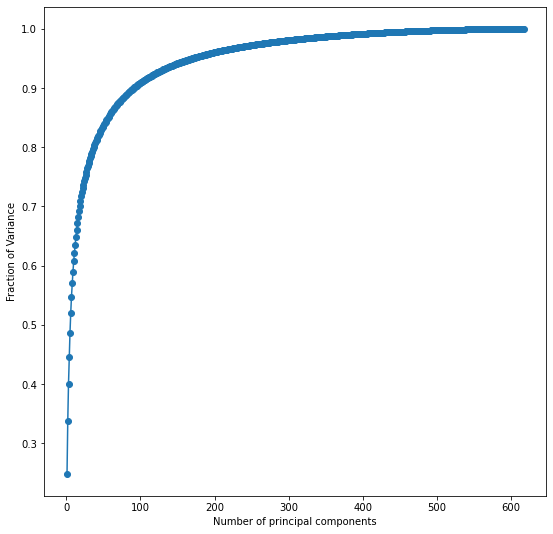

170 components of the total 617 components account for 95.0% of variance
200 components of the total 617 components account for 96.0% of variance
239 components of the total 617 components account for 97.0% of variance
295 components of the total 617 components account for 98.0% of variance
382 components of the total 617 components account for 99.0% of variance


In [ ]:
#PCA + DNN
from sklearn.decomposition import PCA

# create the principal components of the training data
pcaval = PCA()
pcaval.fit(xtrain_s)

# compute how much variance is explained by each component
CUMSUM = np.cumsum(pcaval.explained_variance_ratio_)
print(CUMSUM.size)

plt.figure(figsize=(9,9))
plt.plot(range(1,617+1), CUMSUM, marker='o')
plt.xlabel('Number of principal components')
plt.ylabel('Fraction of Variance')
plt.show()

# print out how many components explain at least 95% of the variance
for i in np.arange(0.95, 0.99, 0.01):
    dmax = np.argmax(CUMSUM >= i) + 1
    print(dmax,"components of the total", pcaval.explained_variance_ratio_.size, "components account for {}% of variance".format(i*100))


In [ ]:
from sklearn.pipeline import Pipeline

# set parameters
param3 = {
    "dnn3__n_neurons": np.arange(1, 100, 20).tolist(),
    "dnn3__activation":["relu", "tanh","selu"],
    "dnn3__optim": ["SGD", "RMSprop", "Adam"],
    }


for i in np.arange(170,380,60):
    def dnn_model3(n_neurons, activation,optim,n=i):
        clf3 = keras.models.Sequential()
        clf3.add(keras.layers.InputLayer(input_shape=[n]))
        for layer in range(2):
            clf3.add(keras.layers.Dense(n_neurons, activation=activation))
        clf3.add(keras.layers.Dense(26, activation="softmax"))
        clf3.compile(loss="sparse_categorical_crossentropy", optimizer=optim, metrics=["accuracy"])
        return clf3
    
    # wrap this DNN to use it in sciki-learn
    clftmp3=keras.wrappers.scikit_learn.KerasClassifier(dnn_model3)
    
    # define a pipeline that combines PCA and DNN
    ppl3 = Pipeline([
        ('pca', PCA(n_components=i)),
        ('dnn3', clftmp3),
    ])
    
    #transform xv
    pcatemp = PCA(n_components=i)
    pcatemp.fit(xt)
    xv_pca = pcatemp.transform(xv)
    
    search_cv3 = RandomizedSearchCV(ppl3, param3, n_iter = 50, cv=3, n_jobs=1)

    # run the grid search
    search_cv3.fit(xt, yt,
            dnn3__epochs = 15,
            dnn3__validation_data = (xv_pca, yv),
            dnn3__verbose = 0,
            dnn3__callbacks=[earlystop, checkpoint]
              )

    print("when n_components =", i,  "best parameter=", search_cv3.best_params_, "best score=",search_cv3.best_score_)

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 45 is smaller than n_iter=50. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


52/52 [==============================] - 0s 3ms/step - loss: 2.6064 - accuracy: 0.0925


52/52 [==============================] - 0s 3ms/step - loss: 0.2151 - accuracy: 0.9405
when n_components = 170 best parameter= {'dnn3__optim': 'Adam', 'dnn3__n_neurons': 81, 'dnn3__activation': 'tanh'} best score= 0.9450897773106893


/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 45 is smaller than n_iter=50. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


52/52 [==============================] - 0s 3ms/step - loss: 2.6369 - accuracy: 0.0859


52/52 [==============================] - 0s 3ms/step - loss: 0.3013 - accuracy: 0.9284
when n_components = 230 best parameter= {'dnn3__optim': 'RMSprop', 'dnn3__n_neurons': 81, 'dnn3__activation': 'tanh'} best score= 0.9448890884717306


/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 45 is smaller than n_iter=50. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


52/52 [==============================] - 0s 3ms/step - loss: 2.8435 - accuracy: 0.0793


52/52 [==============================] - 0s 6ms/step - loss: 0.2735 - accuracy: 0.9393
when n_components = 290 best parameter= {'dnn3__optim': 'RMSprop', 'dnn3__n_neurons': 81, 'dnn3__activation': 'tanh'} best score= 0.9456915855407715


/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 45 is smaller than n_iter=50. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


52/52 [==============================] - 0s 2ms/step - loss: 2.7042 - accuracy: 0.0739


52/52 [==============================] - 0s 4ms/step - loss: 0.2876 - accuracy: 0.9351
when n_components = 350 best parameter= {'dnn3__optim': 'RMSprop', 'dnn3__n_neurons': 81, 'dnn3__activation': 'tanh'} best score= 0.9438876112302145


when n_components = 170 best parameter= {'dnn3__optim': 'Adam', 'dnn3__n_neurons': 81, 'dnn3__activation': 'tanh'} best score= 0.9450897773106893

when n_components = 230 best parameter= {'dnn3__optim': 'RMSprop', 'dnn3__n_neurons': 81, 'dnn3__activation': 'tanh'} best score= 0.9448890884717306

when n_components = 290 best parameter= {'dnn3__optim': 'RMSprop', 'dnn3__n_neurons': 81, 'dnn3__activation': 'tanh'} best score= 0.9456915855407715

when n_components = 350 best parameter= {'dnn3__optim': 'RMSprop', 'dnn3__n_neurons': 81, 'dnn3__activation': 'tanh'} best score= 0.9438876112302145

In [ ]:
def dnn_model3(n_neurons, activation,optim,n):
    clf3 = keras.models.Sequential()
    clf3.add(keras.layers.InputLayer(input_shape=[n]))
    for layer in range(2):
        clf3.add(keras.layers.Dense(n_neurons, activation=activation))
    clf3.add(keras.layers.Dense(26, activation="softmax"))
    clf3.compile(loss="sparse_categorical_crossentropy", optimizer=optim, metrics=["accuracy"])
    return clf3

In [ ]:
# retrieve the best parameters
p9, p10, p11 = ('RMSprop', 81, 'tanh')

dnn3_opt = dnn_model3(optim=p9,n_neurons=p10, activation=p11, n=290)

clftmp3_opt = keras.wrappers.scikit_learn.KerasClassifier(dnn3_opt)

ppl3_opt = Pipeline([
        ('pca', PCA(n_components=290)),
        ('dnn3', dnn3_opt),
    ])

pca_opt = PCA(n_components=290)
pca_opt.fit(xt)
xv_pca = pca_opt.transform(xv)

# train the PCA+DNN
n_epochs = 50
training3 = ppl3_opt.fit(xt, yt, 
                         dnn3__epochs=n_epochs,
                         dnn3__validation_data = (xv_pca, yv),
                         dnn3__callbacks=[checkpoint,earlystop])



Epoch 1/50
156/156 [==============================] - 1s 6ms/step - loss: 1.3378 - accuracy: 0.7196 - val_loss: 0.5126 - val_accuracy: 0.9151
Epoch 2/50
156/156 [==============================] - 1s 5ms/step - loss: 0.2906 - accuracy: 0.9481 - val_loss: 0.2396 - val_accuracy: 0.9479
Epoch 3/50
156/156 [==============================] - 1s 4ms/step - loss: 0.1308 - accuracy: 0.9760 - val_loss: 0.1852 - val_accuracy: 0.9511
Epoch 4/50
156/156 [==============================] - 1s 4ms/step - loss: 0.0713 - accuracy: 0.9876 - val_loss: 0.1614 - val_accuracy: 0.9559
Epoch 5/50
156/156 [==============================] - 1s 4ms/step - loss: 0.0409 - accuracy: 0.9954 - val_loss: 0.1582 - val_accuracy: 0.9543
Epoch 6/50
156/156 [==============================] - 1s 4ms/step - loss: 0.0214 - accuracy: 0.9982 - val_loss: 0.1565 - val_accuracy: 0.9559
Epoch 7/50
156/156 [==============================] - 1s 5ms/step - loss: 0.0114 - accuracy: 0.9992 - val_loss: 0.1774 - val_accuracy: 0.9447
Epoch 

In [ ]:
search_cv3.best_params_

{'dnn3__optim': 'Adam', 'dnn3__n_neurons': 81, 'dnn3__activation': 'tanh'}

In [ ]:
dnn3_opt

In [ ]:
clftmp3_opt

In [ ]:
xt_pca = PCA(n_components=290).fit_transform(xt)
xt_pca.shape

(4990, 290)

In [ ]:
#PCA + SVM
from sklearn.svm import SVC

ppl4 = Pipeline([
    ('pca', PCA()),
    ('svm', SVC(probability = True)),
    ])

param4 = {
    'pca__n_components': np.arange(170,380,60).tolist(),
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__gamma': np.arange(1,1000,100).tolist()
                }

search_cv4 = RandomizedSearchCV(ppl4, param4, cv = 3,
                                n_iter=50,
                                return_train_score=False,
                                verbose=1)

search_cv4.fit(xt,yt)

# Save the best parameters
print(search_cv4.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 38.1min finished


{'svm__kernel': 'linear', 'svm__gamma': 101, 'pca__n_components': 350}


In [ ]:
p12, p13, p14 = search_cv4.best_params_.values()

# Create the optimal classifier
ppl4_opt = Pipeline([
    ('pca', PCA(n_components=p14)),
    ('svm', SVC(probability = True,
               kernel= p12,
               gamma= p13)),
    ])


# Predict on test data; skip normalization because the data has been already normalized
training4 = ppl4_opt.fit(xt,yt)


In [ ]:
ypred1 = clf1_opt.predict_classes(xtest)
ypred2 = clf2_opt.predict_classes(xtest2)
ypred3 = ppl3_opt.predict(xtest)
ypred4 = ppl4_opt.predict(xtest)


In [ ]:
ypred1

array([ 0,  0,  1, ..., 24, 25, 25])

In [ ]:
ypred1.shape

(1559,)

In [ ]:
ypred3[6]

array([7.09606462e-12, 1.17793353e-09, 3.45844370e-07, 9.99825776e-01,
       1.72782288e-09, 3.27435822e-12, 2.74027433e-11, 4.61488270e-08,
       3.26048702e-11, 6.10633451e-13, 1.06385673e-11, 1.03808566e-10,
       2.31024730e-14, 1.40703475e-13, 7.96558908e-09, 1.80944667e-07,
       3.11471161e-11, 5.16951967e-11, 3.54092162e-14, 1.73636232e-04,
       3.22295829e-10, 6.58267260e-11, 4.53653559e-09, 6.30207128e-12,
       1.68333472e-10, 2.24936745e-08], dtype=float32)

In [ ]:
ypred3.shape

(1559, 26)

In [ ]:
#ypred3 = ppl3_opt.predict(xtest)
ypred3_classes=[]
for i in ypred3:
    ypred3_classes.append(np.argmax(i,axis=-1))
ypred3_classes=np.asarray(ypred3_classes,dtype='int64')
ypred3_classes

array([ 0,  0,  1, ..., 24, 25, 25])

In [ ]:
ypred3_classes.shape


(1559,)

In [ ]:
# accuracy, precision,recall and f1 score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

for i in range(0,4):
    if (i==0):
        ypred = ypred1
        label = 'DNN'
    if (i==1):
        ypred = ypred2
        label = 'CNN'
    if (i==2):
        ypred = ypred3_classes
        label = 'PCA+DNN'
    if (i==3):
        ypred = ypred4
        label = 'PCA+SVM'  
    acc = accuracy_score(ytest0, ypred)
    pre = precision_score(ytest0, ypred, average = 'macro')
    rcl = recall_score(ytest0, ypred, average = 'macro')
    f1score = f1_score(ytest0, ypred, average = 'macro')
    print(label+r': Accuracy = %0.3f'%(acc), r'Precision =%0.3f'%(pre), r'Recall =%0.3f'%(rcl),r'F1 score =%0.3f'%(f1score))

DNN: Accuracy = 0.958 Precision =0.959 Recall =0.958 F1 score =0.958
CNN: Accuracy = 0.940 Precision =0.943 Recall =0.940 F1 score =0.940
PCA+DNN: Accuracy = 0.951 Precision =0.952 Recall =0.951 F1 score =0.950
PCA+SVM: Accuracy = 0.956 Precision =0.958 Recall =0.956 F1 score =0.956


<Figure size 576x576 with 0 Axes>

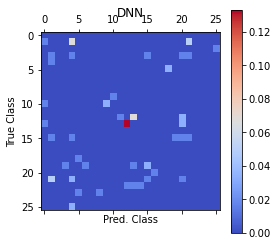

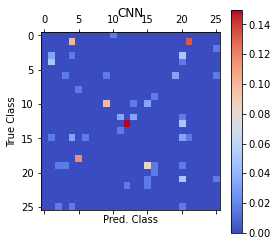

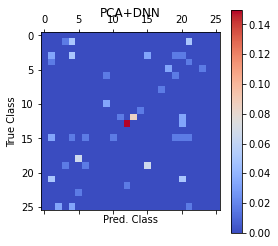

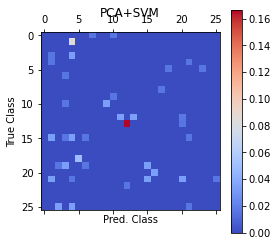

In [ ]:
# error analysis

plt.figure(1, figsize=(8, 8))
plt.clf()
for i in range(0,4):
    if (i==0):
        ypred = ypred1
        label = 'DNN'
    if (i==1):
        ypred = ypred2
        label = 'CNN'
    if (i==2):
        ypred = ypred3_classes
        label = 'PCA+DNN'
    if (i==3):
        ypred = ypred4
        label = 'PCA+SVM'
  
    CM = confusion_matrix(ytest0, ypred)
    CM = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
    np.fill_diagonal(CM,0)
    plt.matshow(CM, cmap=plt.cm.coolwarm)
    plt.title(label)
    plt.xlabel('Pred. Class')
    plt.ylabel('True Class')
    plt.tight_layout
    plt.colorbar()
plt.show()

In [ ]:
ypred1_proba = clf1_opt.predict(xtest)
ypred2_proba = clf2_opt.predict(xtest2)
ypred3_proba = ppl3_opt.predict(xtest)
ypred4_proba = ppl4_opt.predict_proba(xtest)


In [ ]:
from sklearn.preprocessing import label_binarize
ytest0_b = label_binarize(ytest0, classes=np.arange(0, 26)) # ytest0 has values 1 through 26 (digits)
ytest0_b.shape

(1559, 26)

In [ ]:
ytest0_b[-1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

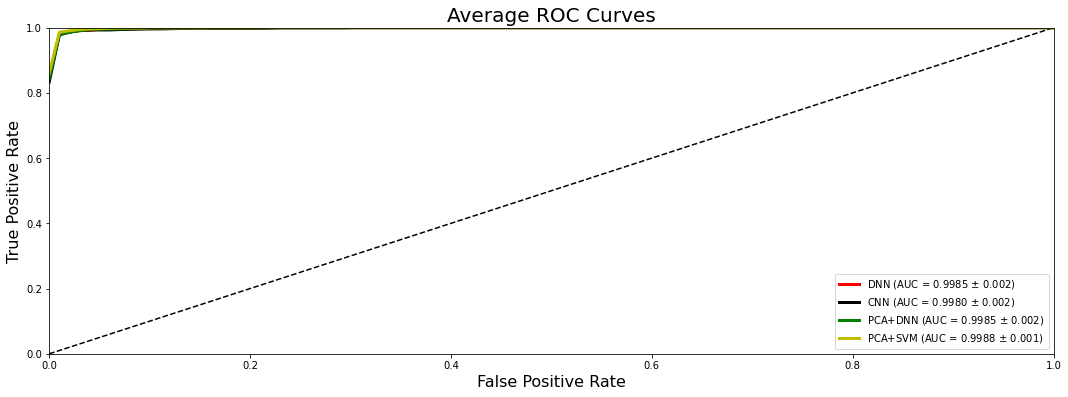

In [ ]:
# compute average ROC curves using ovr classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc

plt.figure(1, figsize=(18, 6))
plt.clf()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Average ROC Curves', fontsize=20)

Fpr_mean = np.linspace(0, 1, 100)
for i in range(0,4):
    if (i==0):
        labelval = 'DNN'
        colorval = 'r'
        ypred_proba = ypred1_proba
        
        # to err on the side of safety, check if there are NaN in the probability vector and, if so, replace them with 0
        ypred_proba[np.isnan(ypred_proba)] = 0
        
    if (i==1):
        labelval = 'CNN'
        colorval = 'k'
        ypred_proba = ypred2_proba
        # to err on the side of safety, check if there are NaN in the probability vector and, if so, replace them with 0
        #ypred_proba[np.isnan(ypred_proba)] = 0
        
    if (i==2):
        labelval = 'PCA+DNN'
        colorval = 'g'
        ypred_proba = ypred3_proba
        
    if (i==3):
        labelval = 'PCA+SVM'
        colorval = 'y'
        ypred_proba = ypred4_proba
    
    tpr_mean = []
    AUC = []
    for j in range(0,np.size(ytest0_b,1)):
        fpr, tpr, T = roc_curve(ytest0_b[:,j], ypred_proba[:,j])
        AUC.append(roc_auc_score(ytest0_b[:,j], ypred_proba[:,j]))
        tpr_mean.append(np.interp(Fpr_mean, fpr, tpr))
    
    Tpr_mean = np.mean(tpr_mean, axis=0)
    mean_auc = auc(Fpr_mean, Tpr_mean)
    std_auc = np.std(AUC)
    plt.plot(Fpr_mean, Tpr_mean, color=colorval, label=r'%s (AUC = %0.4f $\pm$ %0.3f)' % (labelval,mean_auc, std_auc), linewidth=3)
plt.legend()
plt.show()


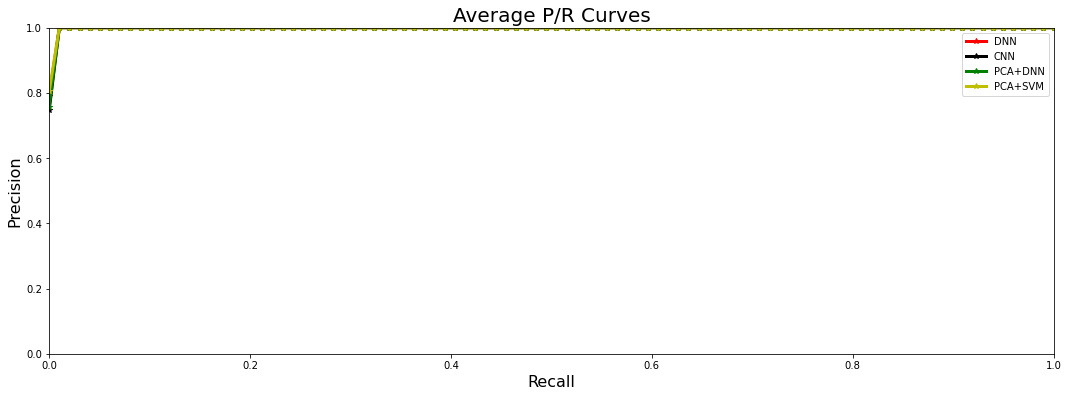

In [ ]:
# compute average Precision-Recall curve
plt.figure(1, figsize=(18, 6))
plt.clf()
plt.axis([0, 1, 0, 1])
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Average P/R Curves', fontsize=20)

Recall_mean = np.linspace(0, 1, 100)

for i in range(0,4):
    if (i==0):
        labelval = 'DNN'
        colorval = 'r'
        ypred_proba = ypred1_proba
        
        # to err on the side of safety, check if there are NaN in the probability vector and, if so, replace them with 0
        ypred_proba[np.isnan(ypred_proba)] = 0
        
    if (i==1):
        labelval = 'CNN'
        colorval = 'k'
        ypred_proba = ypred2_proba
        # to err on the side of safety, check if there are NaN in the probability vector and, if so, replace them with 0
        #ypred_proba[np.isnan(ypred_proba)] = 0
        
    if (i==2):
        labelval = 'PCA+DNN'
        colorval = 'g'
        ypred_proba = ypred3_proba
        
    if (i==3):
        labelval = 'PCA+SVM'
        colorval = 'y'
        ypred_proba = ypred4_proba
    
    prec_mean = []
    for j in range(0,np.size(ytest0_b,1)):
        prc, rcl, T = precision_recall_curve(ytest0_b[:,j], ypred_proba[:,j])
        prec_mean.append(np.interp(Recall_mean, rcl, prc))
    Precision_mean = np.mean(prec_mean, axis=0)
    plt.plot(Recall_mean, Precision_mean, color=colorval, marker='*', label=labelval, linewidth=3)
plt.legend()
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline

# set the range of parameters to test
param_distribs3 = {
    'pca__n_components': np.arange(170,380,60),
    "dnn3__n_neurons": np.arange(1, 100, 20).tolist(),
    "dnn3__activation":["relu", "tanh","selu"],
    #"dnn3__n_components": i,
    }


# define a pipeline that combines PCA and DNN
ppl3 = Pipeline([
       ('pca', PCA()),
       ('dnn3', clftemp3),
    ])

    
search_cv3 = RandomizedSearchCV(ppl3, param_distribs3, n_iter = 50, cv=3, verbose=0, n_jobs=1)

    # run the grid search
search_cv3.fit(xt, yt,
            #epochs = 15,
            #validation_data = (xv, yv),
            #verbose = 0,
            #callbacks=[earlystop_cb, checkpoint_cb]
              )

print("when n_components =", i, "best parameter=",search_cv3.best_params_)

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
TypeErro

TypeError: dnn_model3() missing 1 required positional argument: 'n'

In [ ]:
ppl3.get_params()

{'memory': None,
 'steps': [('pca', PCA()),
  ('dnn3',
   <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier at 0x7f2b087b4160>)],
 'verbose': False,
 'pca': PCA(),
 'dnn3': <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier at 0x7f2b087b4160>,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'dnn3__build_fn': <function __main__.dnn_model3(n_neurons, optim, activation)>}

In [ ]:
search_cv1 = RandomizedSearchCV(clftemp, param_distribs1, n_iter = 5, cv=3, verbose=0, n_jobs=1)

# run the grid search
search_cv1.fit(xtrain, ytrain,
            epochs = 5,
            validation_data = (xtest, ytest),
            verbose = 0,
            callbacks=[earlystop_cb, checkpoint_cb])

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 66, in _method_wrapper
    return method(self, *args, **kwargs)
  File "/home/chen

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 66, in _method_wrapper
    return method(self, *args, **kwargs)
  File "/home/chen

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 66, in _method_wrapper
    return method(self, *args, **kwargs)
  File "/home/chen

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 66, in _method_wrapper
    return method(self, *args, **kwargs)
  File "/home/chen

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/chengeng/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 66, in _method_wrapper
    return method(self, *args, **kwargs)
  File "/home/chen

InvalidArgumentError:  Received a label value of 26 which is outside the valid range of [0, 26).  Label values: 17 17 18 18 19 19 20 20 21 21 22 22 23 23 24 24 25 25 26 26 1 1 2 2 3 3 4 4 5 5 6 6
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at /home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765) ]] [Op:__inference_test_function_147457]

Function call stack:
test_function


In [ ]:
xtrain

array([[-0.4394, -0.093 ,  0.1718, ...,  0.641 ,  0.5898, -0.4872],
       [-0.4348, -0.1198,  0.2474, ...,  0.4318,  0.4546, -0.091 ],
       [-0.233 ,  0.2124,  0.5014, ...,  0.254 ,  0.1588, -0.4762],
       ...,
       [-0.5824, -0.1646,  0.1406, ...,  0.6812,  0.517 ,  0.343 ],
       [ 0.016 ,  0.8168,  1.    , ...,  0.1034, -0.1954, -0.862 ],
       [-0.6116, -0.104 ,  0.2566, ..., -0.0536,  0.0714, -0.0892]])